# Exercise 1 - Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd


We start by loading the data and processing the columns to get everything ready for processing.We separate the known class labels, i.e., first column, and the rest of the data we'll use for clustering.

In [3]:
wine_pd = pd.read_csv('wine.csv')

wine_np = wine_pd.to_numpy()
wine_pd.head() # check if everything is in place


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Separate the data for clustering and the clases.

In practical cases, you might not have such information, but when you do, these might be used to either evaluate or "supervise" the model you are trying to build.

In [7]:
from sklearn.preprocessing import normalize

class_labels_known = np.asarray(wine_np[:,0], 'i') 
class_labels_known -= 1 # get the labels start from 0

data_to_cluster = wine_np[:,1::]
data_to_cluster = normalize(data_to_cluster)

In [18]:
data_to_cluster.shape

(178, 13)

And we then move on to the clustering operations. We use scikit-learn functions here but in the attached solution file, you'll see that we've included an example with scipy functions as well.

In [9]:
#computing K-Means with K = 3 (3 clusters)
km_model = KMeans(init='random', n_clusters=3, n_init=10)
km_model.fit_predict(data_to_cluster)
cluster_results = km_model.labels_

## Let's check the results and try to compare with known labels
for i, cluster_label in enumerate(cluster_results):
    print("Cluster result: ", cluster_label, " Known labels: ",class_labels_known[i])

Cluster result:  0  Known labels:  0
Cluster result:  0  Known labels:  0
Cluster result:  0  Known labels:  0
Cluster result:  0  Known labels:  0
Cluster result:  2  Known labels:  0
Cluster result:  0  Known labels:  0
Cluster result:  0  Known labels:  0
Cluster result:  0  Known labels:  0
Cluster result:  0  Known labels:  0
Cluster result:  0  Known labels:  0
Cluster result:  0  Known labels:  0
Cluster result:  0  Known labels:  0
Cluster result:  0  Known labels:  0
Cluster result:  0  Known labels:  0
Cluster result:  0  Known labels:  0
Cluster result:  0  Known labels:  0
Cluster result:  0  Known labels:  0
Cluster result:  0  Known labels:  0
Cluster result:  0  Known labels:  0
Cluster result:  2  Known labels:  0
Cluster result:  2  Known labels:  0
Cluster result:  2  Known labels:  0
Cluster result:  0  Known labels:  0
Cluster result:  0  Known labels:  0
Cluster result:  0  Known labels:  0
Cluster result:  2  Known labels:  0
Cluster result:  0  Known labels:  0
C

The resulting clustering results are often referred to as "labels". These are usually numbers starting from 0 and going up to a number equal to the number of clusters, e.g., for K=3 we get labels 0,1,2.

We need to be really careful here. We notice that it is not easily possible to compare the known class labels to clustering labels. The reason is that the clustering algorithm labels are just arbitrary and not assigned to any deterministic criteria. Each time you run the algorithm, you might get a different id for the labels. The reason is that the label itself doesn't actually mean anything, what is important is the list of items that are in the same cluster and their relations.

A way to come over this ambiguity and evaluate the results is to look at a visualisations of the results and compare. But this brings in the question of what type of visualisation to use for looking at the clusters. An immediate alternative is to use scatterplots. However, it is not clear which axis to use for clustering. A common method to apply at this stage is to make use of PCA to get a 2D plane where we can project the data points and visualise them over this projection.

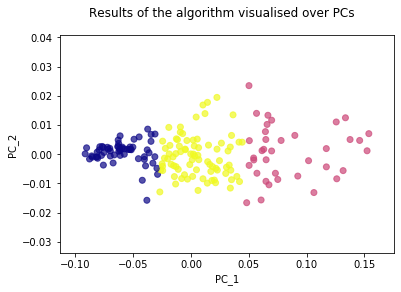

In [24]:
pca = PCA(n_components=2)

# We first fit a PCA model to the data
pca.fit(data_to_cluster)

# have a look at the components directly if we can notice any interesting structure
projected_axes = pca.transform(data_to_cluster)

columnIDToVisX = 0 # some variable to keep indexing simple and flexible
columnIDToVisY = 1

plt.suptitle('Results of the algorithm visualised over PCs')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
# some plotting using numpy's logical indexing
# plt.scatter(projected_axes[cluster_results ==0,columnIDToVisX], projected_axes[cluster_results==0,columnIDToVisY], c = "#66c2a5", s = 50, alpha = 0.7, linewidth='0') # greenish
# plt.scatter(projected_axes[cluster_results ==1,columnIDToVisX], projected_axes[cluster_results==1,columnIDToVisY], c = "#fc8d62", s = 50, alpha = 0.7, linewidth='0') # orangish
# plt.scatter(projected_axes[cluster_results ==2,columnIDToVisX], projected_axes[cluster_results==2,columnIDToVisY], c = "#8da0cb", s = 50, alpha = 0.7, linewidth='0') # blueish
# plt.show()

plt.scatter(projected_axes[:,0], projected_axes[:,1], cmap="plasma", c=cluster_results, alpha=.7)


In [15]:
projected_axes

array([[-3.74249996e-02,  8.56634034e-03],
       [-6.12918310e-02,  6.26313138e-03],
       [-6.97808941e-02, -6.51972713e-04],
       [-7.94609232e-02,  1.43299675e-03],
       [ 5.42099711e-03,  5.15074236e-03],
       [-7.88410687e-02,  2.53551758e-03],
       [-8.11616431e-02,  6.73963366e-04],
       [-6.25761524e-02,  3.66470846e-03],
       [-6.27344322e-02,  2.67003612e-03],
       [-6.14261631e-02,  1.21996736e-03],
       [-8.59156523e-02, -6.04652682e-04],
       [-8.09808893e-02, -8.93604557e-04],
       [-8.77367904e-02, -1.66809721e-03],
       [-7.67392418e-02,  2.63132049e-03],
       [-9.02983699e-02,  2.16632915e-03],
       [-7.02568710e-02,  1.99791560e-03],
       [-6.17405506e-02,  1.74585131e-03],
       [-5.34581653e-02,  1.56056162e-03],
       [-9.15100317e-02,  1.10683385e-04],
       [-1.91601205e-02,  9.15559423e-03],
       [ 4.49941055e-03,  1.27026920e-02],
       [-2.21371458e-02,  1.97166131e-03],
       [-5.77059532e-02,  1.80606841e-03],
       [-6.

First the results of the clustering algorithm: We can see that they are nicely separated on the PCA projection. This shows the parallelism between the clustering algorithm and PCA. By looking at the PCA loadings, we can find out what the x-axis mean and try to interpret the clusters (We leave this as an additional exercise for those interested). You can get help from Week05 exercise on interpreting the loadings.

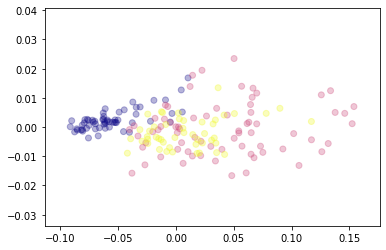

In [20]:
# plt.suptitle('Known labels visualised over PCs')
# plt.scatter(projected_axes[class_labels_known==0,columnIDToVisX], projected_axes[class_labels_known==0,columnIDToVisY], c = "#66c2a5", s = 50, alpha = 0.7, linewidth='0')
# plt.scatter(projected_axes[class_labels_known==1,columnIDToVisX], projected_axes[class_labels_known==1,columnIDToVisY], c = "#fc8d62", s = 50, alpha = 0.7, linewidth='0')
# plt.scatter(projected_axes[class_labels_known==2,columnIDToVisX], projected_axes[class_labels_known==2,columnIDToVisY], c = "#8da0cb", s = 50, alpha = 0.7, linewidth='0')
# plt.show()

plt.scatter(projected_axes[:,columnIDToVisX], projected_axes[:,columnIDToVisY], c = class_labels_known, cmap = "plasma", alpha= 0.3)

In the figure below, on the other side, we colored the points based on the actual labels, we observe that there has been several misclassifications in the figure above (i.e., in the algorithm's results). So one may choose to use an alternative algorithm or devise a better distance metric.

# Exercise 02 - From clustering to classification

This exercise aims at introducing classification, and the main steps to build and evaluate a classifier.

In [7]:
from sklearn import datasets
n_samples = 2000
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.15)
X, y_true = noisy_moons[0], noisy_moons[1]

<function matplotlib.pyplot.show(*args, **kw)>

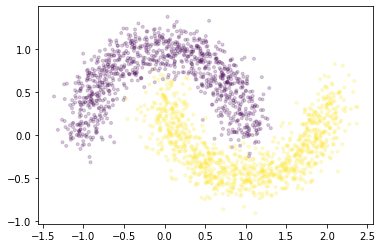

In [8]:

plt.scatter( X[:,0], X[:,1], c=y_true, marker = '.', alpha = 0.2)
plt.show

## Clustering

<function matplotlib.pyplot.show(*args, **kw)>

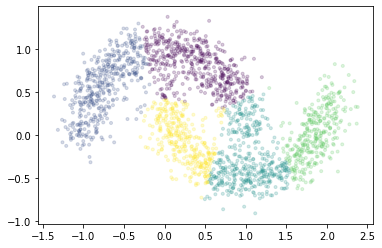

In [9]:
km_moons = KMeans(n_clusters = 5)
y_cluster = km_moons.fit_predict(X)

plt.scatter( X[:,0], X[:,1], c=y_cluster, marker = '.', alpha = 0.2)
plt.show

Here we notice that even if we, as external observers, clearly see two groups of data (the two moons), a k-means algorithm will fail.
As it works using euclidian distance, it will group things together which apparently don't belong to the same cluster.

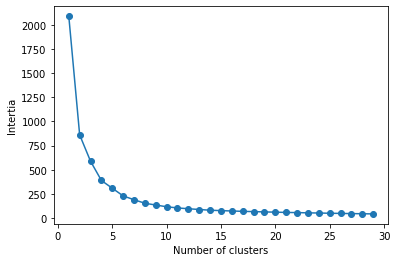

In [10]:
inertias = []
for i in range(1, 30):
    km = KMeans( n_clusters=i)
    km.fit(X)
    inertias.append(km.inertia_)

# plot
plt.plot(range(1, 30), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Intertia')
plt.show()

Let's pick 12 clusters, and visualize the results

<function matplotlib.pyplot.show(*args, **kw)>

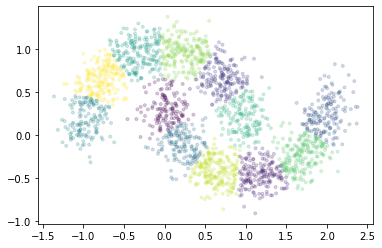

In [11]:
km_moons = KMeans(n_clusters = 12)
y_cluster = km_moons.fit_predict(X)

plt.scatter( X[:,0], X[:,1], c=y_cluster, marker = '.', alpha = 0.2)
plt.show

Here, each cluster belongs now to a single moon. There are of course errors due to the noise in the dataset.
You can generate a new dataset with different levels of noise and observe the effects on K-means clustering.

## Introduction to classification

In order to perform classification, we must hold out a part of our dataset (testing set). We can never, in any circumstances, train and test on the same data.

The data is shuffled by default using the make_moons function, but in the general case, verify that it is.

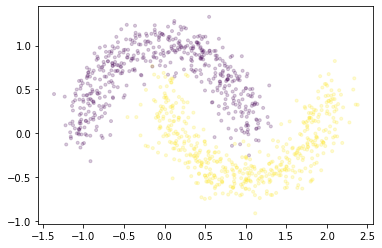

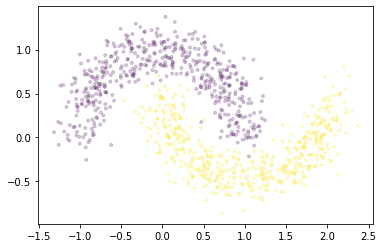

In [13]:
X_train = X[:int(n_samples/2), :]
X_test = X[int(n_samples/2):, :]

y_true_train = y_true[:int(n_samples/2), ]
y_true_test = y_true[int(n_samples/2):, ]

plt.scatter( X_train[:,0], X_train[:,1], c=y_true_train, marker = '.', alpha = 0.2)
plt.show()

plt.scatter( X_test[:,0], X_test[:,1], c=y_true_test, marker = '.', alpha = 0.2)
plt.show()



Now we train our clustering on the training set, and visualize on the testing set.

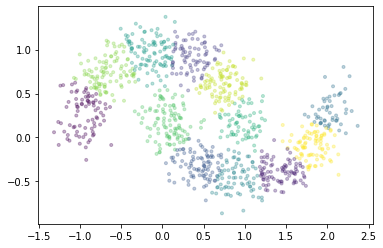

In [19]:
km_moons = KMeans(n_clusters = 12)
km_moons.fit(X_train)

assigned_cluster_test = km_moons.predict(X_test) 

plt.scatter( X_test[:,0], X_test[:,1], c=assigned_cluster_test, marker = '.', alpha = 0.3)
plt.show()

Now, we want to predict the class $y_{pred}$ using the testing set.
What we can do is assign to each cluster the class corresponding to the most common class (moon index) in the training points that belong to this cluster.


In [20]:
import operator

# first, assign the clusters on the training set
assigned_cluster_train = km_moons.predict(X_train)

# then, calculate the maximum count of the true value of the moon label 
cluster_correspondence = {}

for i in range(km_moons.n_clusters):
    
    is_in_cluster = (assigned_cluster_train == i)
    
    # this trick is to assign a particular value -1 to the points not assigned to cluster i, so that we don't count them
    count_true_labels = y_true_train * (is_in_cluster==True) + (-1)*(is_in_cluster==False)
    unique, counts = np.unique(count_true_labels, return_counts=True)  
    count_labels = dict(zip(unique, counts))
    
    # remove the -1 that corresponds to all other clusters except cluster i
    count_labels.pop(-1)
    
    # Assign to the majority
    predicted_moon = max(count_labels.items(), key=operator.itemgetter(1))[0]
    
    cluster_correspondence[i] = predicted_moon
    
# Now that we calculated the correspondence between the clusters from k-means and the actual moon class, we can predict!
predicted_moon_class = np.vectorize(cluster_correspondence.get)(assigned_cluster_test)

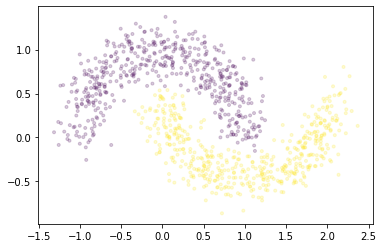

In [21]:
plt.scatter( X_test[:,0], X_test[:,1], c=predicted_moon_class, marker = '.', alpha = 0.2)
plt.show()

We can compare our prediction predicted_moon_class with the actual class y_true_test to evaluate the classification accuracy of our classifier.

Other metrics exist, and we will see that in lecture 08.

In [17]:
accuracy = sum(predicted_moon_class == y_true_test)/ len(predicted_moon_class)
print(accuracy*100) # to have it in percent

98.9


## Conclusion

We built a very simple and naive classifier based on the segmentation of space performed by K-means.

You can test by youself if using GMM works, and how the number of clusters / mixtures influences the results.

Also, try with different values of noise with the moon dataset. 

In general, it is possible to select the model (GMM or Kmeans) and hyperparameters (number of mixtures / clusters) in order to obtain the best accuracy possible. 

However, one should take care again to not overfit, and it is then uselful to split the dataset into a training set, a validation set, and a testing set. More on that in Lecture 08.